In [175]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [321]:
%matplotlib inline

In [440]:
G = nx.DiGraph()

In [441]:
G.add_node(0)

In [442]:
G.node[0] = (-1, 'root')

In [443]:
G.nodes()

[0]

In [444]:
def grow_branches(G, root, branches = []):
    startnode = np.max([x for x in G.nodes()]) + 1
    #print startnode
    edges = [(root,i + startnode) for i, branch in enumerate(branches)]
    #print edges
    G.add_edges_from(edges)
    for j, n in enumerate(branches):
        G.node[j + startnode] = (root, n)

In [445]:
[x for x in G.nodes()]

[0]

In [446]:
G.nodes()

[0]

# Level 1

In [447]:
level1=['HR Services', 'IT', 'Legal Services', 'Office Solutions', 'Professional Services']

In [448]:
G.nodes()

[0]

In [449]:
grow_branches(G, root = 0, branches = level1)

In [450]:
G.nodes()

[0, 1, 2, 3, 4, 5]

In [451]:
G.node

{0: (-1, 'root'),
 1: (0, 'HR Services'),
 2: (0, 'IT'),
 3: (0, 'Legal Services'),
 4: (0, 'Office Solutions'),
 5: (0, 'Professional Services')}

# Level 2

In [452]:
HRServices = ['Benefits', 'Coaching', 
     'HR Consulting', 
     'HR Services - Other', 
     'Mobility / Relocation', 
     'Payroll Outsourcing',
     'Recruiting',
     'Temporary Labor',
     'Training']

IT = ['Data & Analysis Services','Hardware','Managed Services','Projects','Software']

LegalServ = ['eDiscovery', 'Litigation', 'Other Legal Matter Types', 'Patent & Trademarks']

ProfServ = ['Financial Services',
'Management Consulting',
'Miscellaneous']

OfSol = ['Office Furniture',
'Office Supplies']

In [453]:
grow_branches(G, 1, HRServices)

In [454]:
G.node

{0: (-1, 'root'),
 1: (0, 'HR Services'),
 2: (0, 'IT'),
 3: (0, 'Legal Services'),
 4: (0, 'Office Solutions'),
 5: (0, 'Professional Services'),
 6: (1, 'Benefits'),
 7: (1, 'Coaching'),
 8: (1, 'HR Consulting'),
 9: (1, 'HR Services - Other'),
 10: (1, 'Mobility / Relocation'),
 11: (1, 'Payroll Outsourcing'),
 12: (1, 'Recruiting'),
 13: (1, 'Temporary Labor'),
 14: (1, 'Training')}

In [455]:
grow_branches(G, 2, IT)
grow_branches(G, 3, LegalServ)
grow_branches(G, 4, ProfServ)
grow_branches(G, 5, OfSol)

In [456]:
G.node

{0: (-1, 'root'),
 1: (0, 'HR Services'),
 2: (0, 'IT'),
 3: (0, 'Legal Services'),
 4: (0, 'Office Solutions'),
 5: (0, 'Professional Services'),
 6: (1, 'Benefits'),
 7: (1, 'Coaching'),
 8: (1, 'HR Consulting'),
 9: (1, 'HR Services - Other'),
 10: (1, 'Mobility / Relocation'),
 11: (1, 'Payroll Outsourcing'),
 12: (1, 'Recruiting'),
 13: (1, 'Temporary Labor'),
 14: (1, 'Training'),
 15: (2, 'Data & Analysis Services'),
 16: (2, 'Hardware'),
 17: (2, 'Managed Services'),
 18: (2, 'Projects'),
 19: (2, 'Software'),
 20: (3, 'eDiscovery'),
 21: (3, 'Litigation'),
 22: (3, 'Other Legal Matter Types'),
 23: (3, 'Patent & Trademarks'),
 24: (4, 'Financial Services'),
 25: (4, 'Management Consulting'),
 26: (4, 'Miscellaneous'),
 27: (5, 'Office Furniture'),
 28: (5, 'Office Supplies')}

In [457]:
Recruiting = ['Assessment Center / Employee Assessments',
'Recruiting - Contingent Search',
'Recruiting - Other',
'Recruiting - Retained Search / Headhunter']

Training = ['Training - Customer Service, Sales, Marketing & Commercial',
'Training - Finance, Accounting, General Management, Strategy',
'Training - Information Technology',
'Training - Language & Intercultural',
'Training - Law & Compliance',
'Training - Leadership, Personal Effectiveness & Soft Skills',
'Training - Other',
'Training - Production Operations',
'Training - Project Management, Continuous Improvement',
'Training - Research & Development and Medical',
'Training - Supply Chain & Procurement']

DataAnServ = ['Data & Information Services','eContent']

Hardware = ['DataCenter','Media Technology','Output','Telecommunication','Workplace']

MagServ = ['Application Maintenance', 'Enterprise IT Services','Infrastructure','Workplace Services']

Projects = ['Application Development', 'Infrastructure Projects', 'IT Consulting', 'Turnkey Projects', 'Workplace Projects']

Software = ['Business Intelligence Software', 'Business Software', 'Database Software',
'Groupware Software', 'Production Software', 'Sales & Marketing Software',
'Scientific Software', 'Security Software', 'Software material group - to be validated',
'Sysem Management Software'
'Workplace Software']

FinServ = ['Accounting','Tax Treasury']

ManCons = ['Functional Optimization', 'Management Consulting', 
           'PMO & Implementation', 'Strategy Consulting', 'Workshop Support']

misc = ['Research', 'Technical Consulting', 'Translation Services']

In [458]:
grow_branches(G, 6, Recruiting)
grow_branches(G, 7, Training)
grow_branches(G, 8, DataAnServ)
grow_branches(G, 9, Hardware)
grow_branches(G, 10, MagServ)
grow_branches(G, 11, Projects)
grow_branches(G, 12, Software)
grow_branches(G, 13, FinServ)
grow_branches(G, 14, ManCons)
grow_branches(G, 15, misc)

In [459]:
G.neighbors(0)

[1, 2, 3, 4, 5]

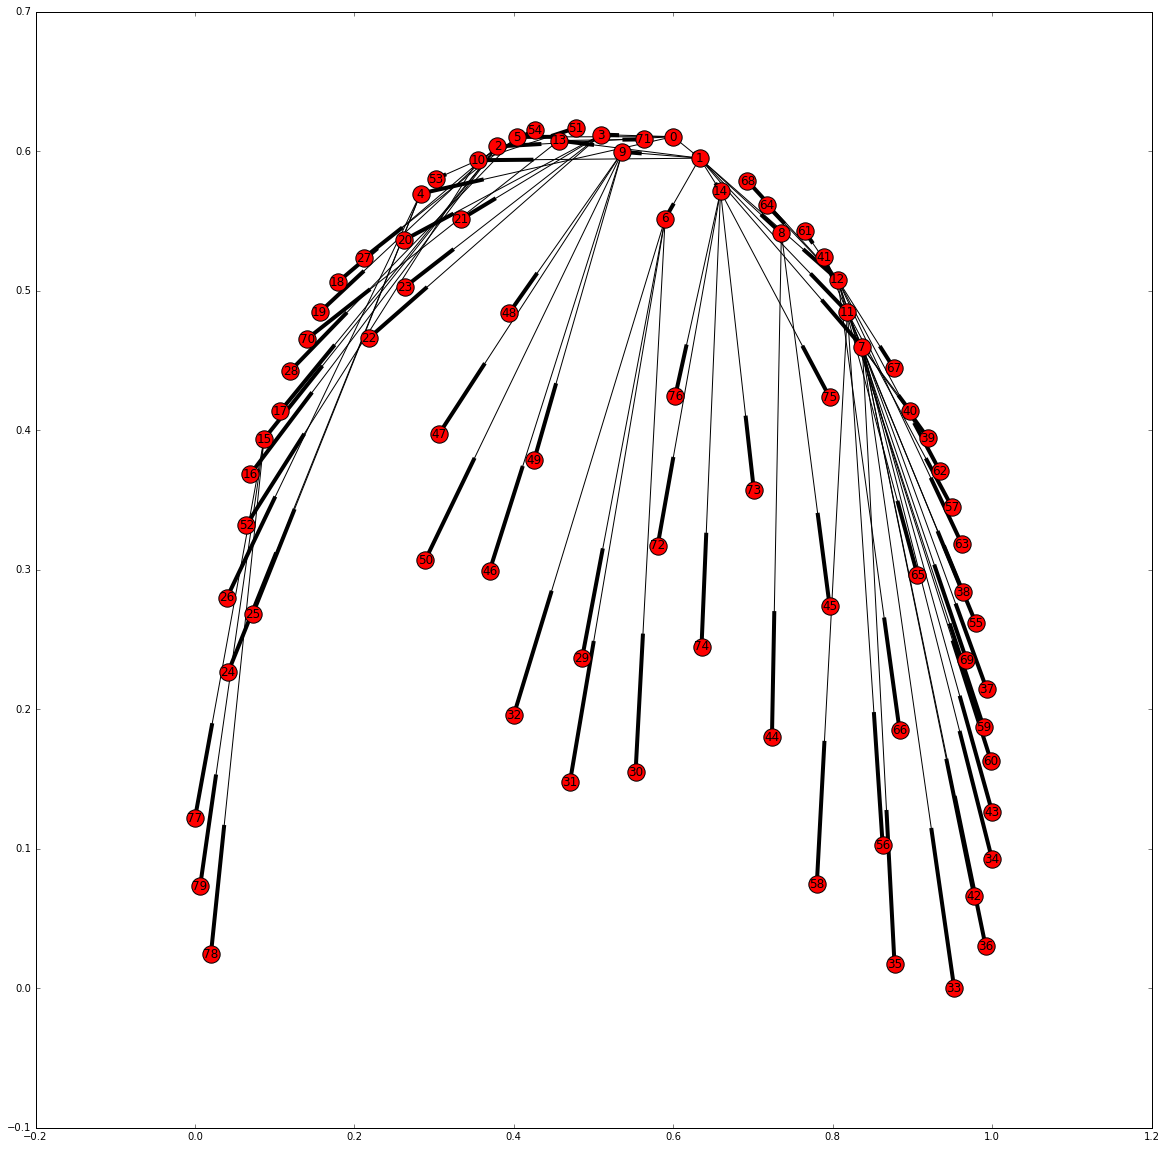

In [463]:
plt.figure(3,figsize=(20,20)) 
nx.draw_networkx(G, with_labels=True)
plt.show()

In [464]:
pd.DataFrame(zip([x[1] for x in G.node.values()],
                 [x[0] for x in G.node.values()],
                 G.nodes()
                 ))

,0,1,2
0,root,-1,0
1,HR Services,0,1
2,IT,0,2
3,Legal Services,0,3
4,Office Solutions,0,4
5,Professional Services,0,5
6,Benefits,1,6
7,Coaching,1,7
8,HR Consulting,1,8
9,HR Services - Other,1,9
